In [11]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Are alternate genes useful for normalization?

What is the coverage like across them? How tightly can they cause the anchor genes to cluster? <br>
Do we need to think about these genes being essential??

In [3]:
df_whole = pd.read_csv('/cellar/users/ramarty/Data/kir/components/alternate/components_four_counts.csv', index_col=0)

In [11]:
samples = population_dictionary_stripped[population_dictionary.keys()[0]]
df_tmp = df_whole.ix[samples].dropna()

In [5]:
ref_genes

['PVR', 'ZNF17', 'FUT3', 'JUND', 'RAX2', 'ATP1A3', 'NOTCH3']

#### Visualizing properties of alternate genes

Overall coverage based on all kmers

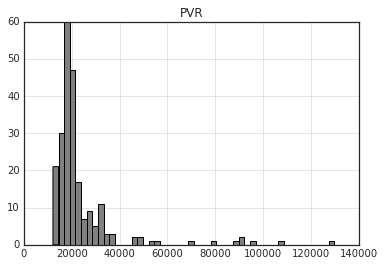

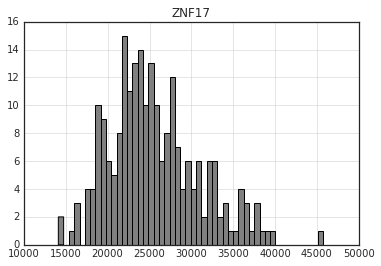

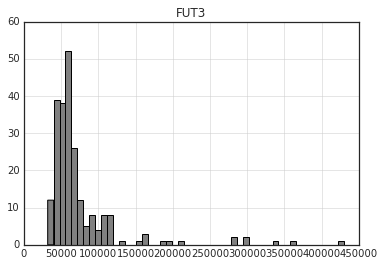

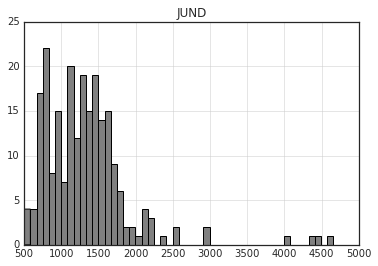

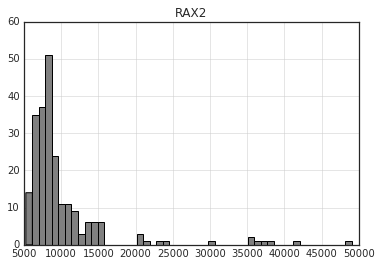

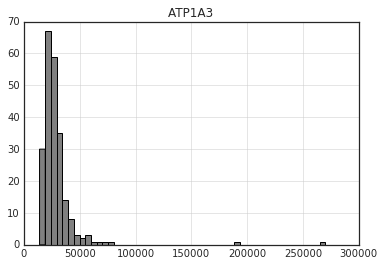

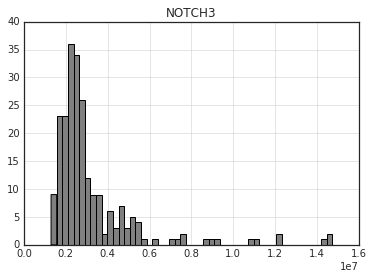

In [13]:
for gene in ref_genes:
    df_tmp[refs[gene]].sum(axis=1).hist(bins=50, color='grey')
    plt.title(gene)
    plt.show()
    plt.clf()

How do the individual kmers contribute to these distributions

In [37]:
# narrow down the kmers displayed - change these to percentiles
expressed_gene_kmers = df_tmp[refs[gene]].sum()[(df_tmp[refs[gene]].sum() > 8000)&(df_tmp[refs[gene]].sum() < 10000)].index
len(expressed_gene_kmers)

220

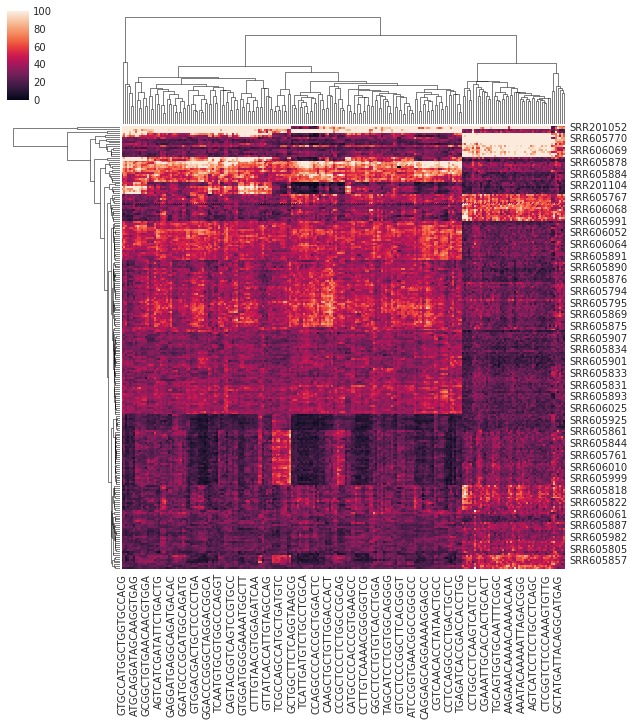

In [40]:
sns.clustermap(df_tmp[expressed_gene_kmers], vmax=100)

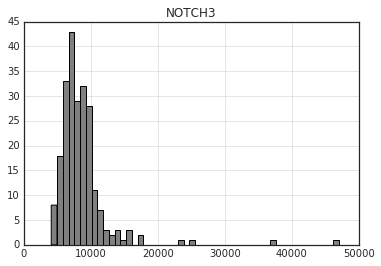

In [41]:
df_tmp[expressed_gene_kmers].sum(axis=1).hist(bins=50, color='grey')
plt.title(gene)

In [65]:
# sort by overall coverage for patients, then cluster by kmer
patients_sorted_by_coverage = list(df_tmp[four_mers].sum(axis=1).sort(inplace=False).index)

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from IPython.kernel.zmq import kernelapp as app


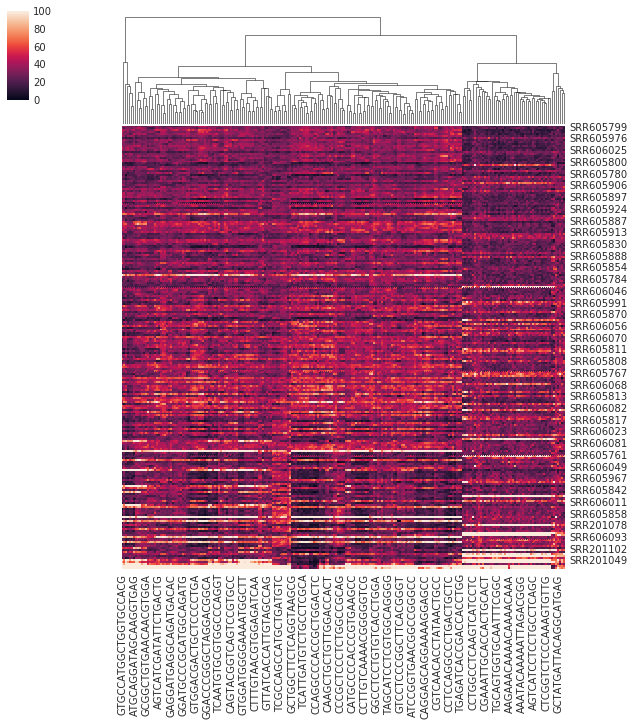

In [66]:
sns.clustermap(df_tmp.ix[patients_sorted_by_coverage, expressed_gene_kmers], row_cluster=False, vmax=100)

#### Raw counts across the population

In [7]:
df_whole = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/kir/components/alternate/components_four_read_counts.csv', index_col=0),
                      pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/components_four_read_counts.csv', index_col=0)])

In [12]:
large_populations, size = [], []
for i, population in enumerate(population_dictionary.keys()):
    samples = population_dictionary_stripped[population]
    df_tmp = df_whole.ix[samples].dropna()
    if len(df_tmp) > population_size_cutoff:
        large_populations.append(population)
        size.append(len(df_tmp))
plotting_df = pd.DataFrame({'Population': large_populations,
                            'Size': size})
plotting_df = plotting_df.sort_values('Size', ascending=False)

In [13]:
# exclude low coverage
df_whole = df_whole.ix[[x for x in df_whole.index if x not in low_coverage_patients]]

32.0 2443.0
PVR


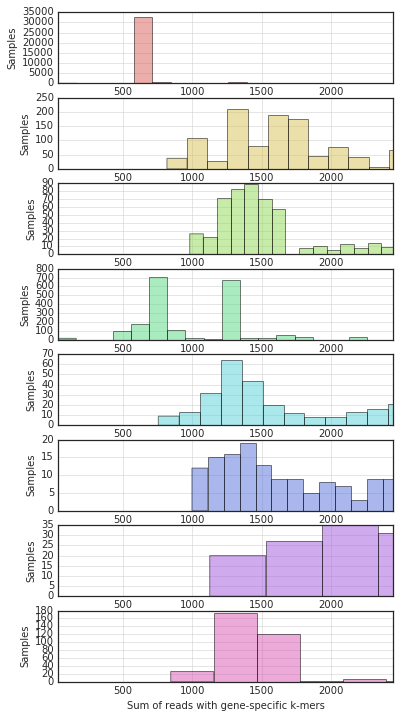

0.0 3405.0
ZNF17


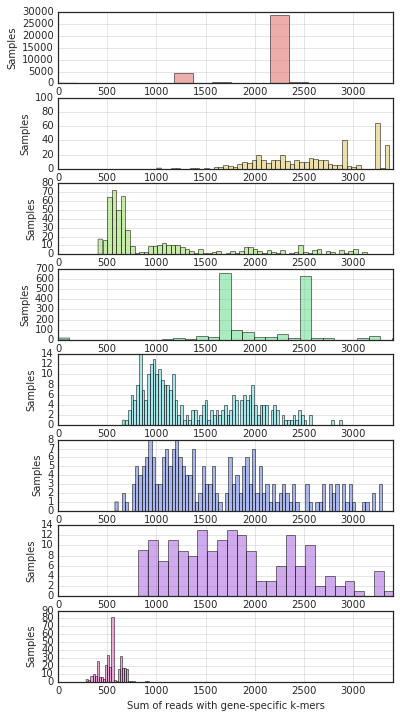

35.0 4932.35
FUT3


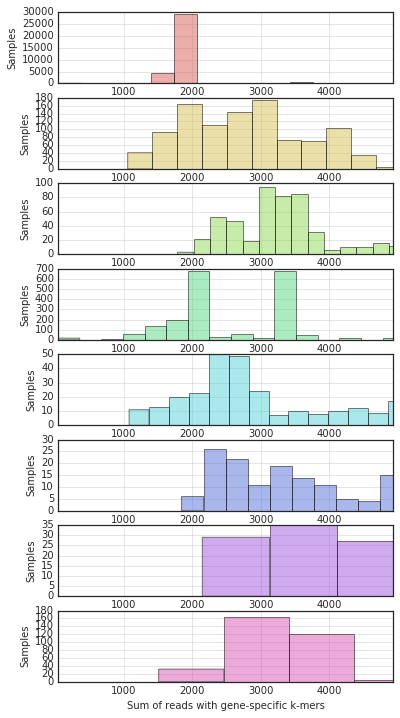

8.0 637.0
JUND


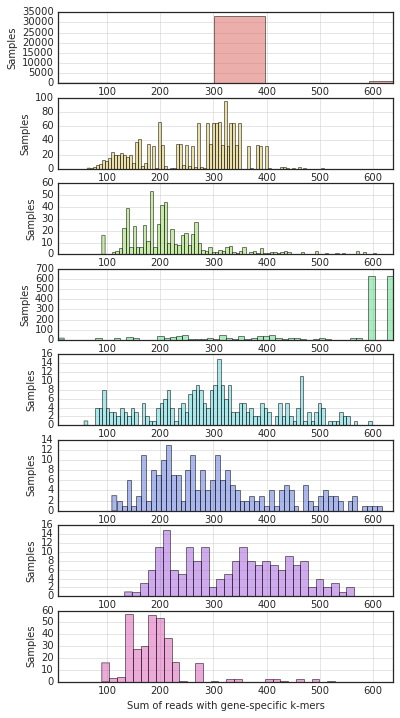

1.0 310.0
RAX2


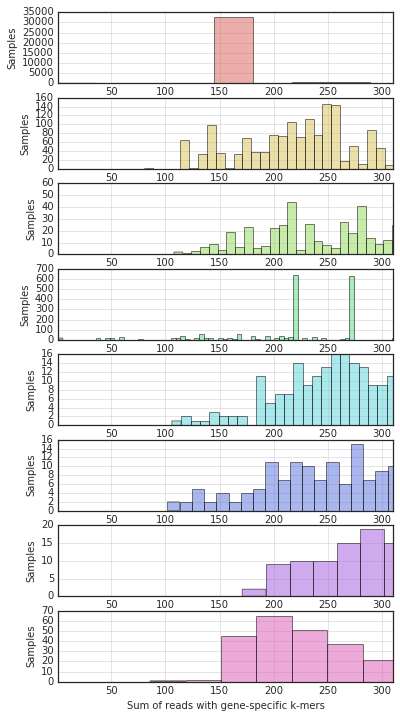

0.0 1875.0
ATP1A3


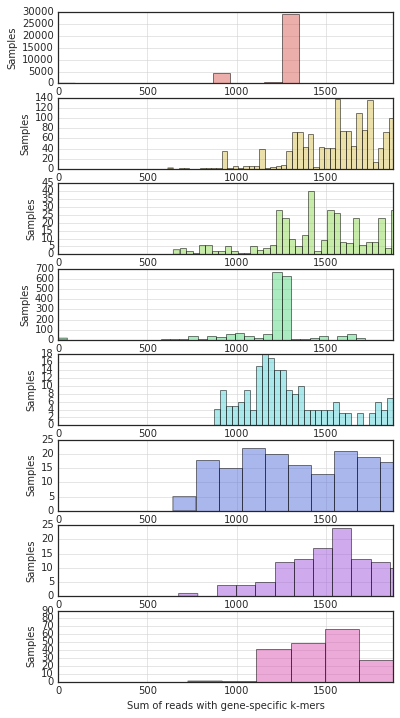

7958.0 317115.5
NOTCH3


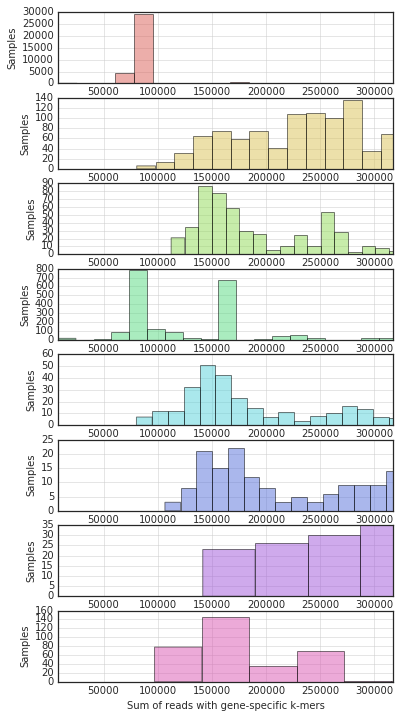

In [14]:
k = 20
palette = sns.color_palette("hls", len(large_populations))
for gene in ref_genes:
    f, axarr = plt.subplots(4, sharex=True, figsize=(6, 12))
    # add color
    minimum, maximum = df_whole[refs[gene]].sum(axis=1).min(), df_whole[refs[gene]].sum(axis=1).quantile(.975)
    print minimum, maximum
    
    for i, population in enumerate(list(plotting_df.Population)):
        try:
            samples = population_dictionary_stripped[population]
            df_tmp = df_whole.ix[samples].dropna()
            plt.subplot(len(large_populations), 1, i+1)
            if len(samples) > 200:
                df_tmp[refs[gene]].sum(axis=1).hist(bins=80, alpha=0.5, color=palette[i])
            else: 
                df_tmp[refs[gene]].sum(axis=1).hist(bins=30, alpha=0.5, color=palette[i])
            plt.xlim(minimum, maximum)
            plt.ylabel('Samples')
            plt.xlabel('Sum of reads with gene-specific k-mers')

        except:
            print population
    #f.suptitle(gene)
    print gene
    plt.show()
    plt.clf()